# Projet P5 - Segmentation client d'un site E-commerce

# Chargement des bases et import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import time
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from yellowbrick.cluster import KElbowVisualizer



In [2]:
customers = pd.read_csv(r'C:\Users\Hugues\gdrive\Notebooks\P5\olist_customers_dataset.csv')
geolocation = pd.read_csv(r'C:\Users\Hugues\gdrive\Notebooks\P5\olist_geolocation_dataset.csv')
order_items = pd.read_csv(r'C:\Users\Hugues\gdrive\Notebooks\P5\olist_order_items_dataset.csv')
order_payments = pd.read_csv(r'C:\Users\Hugues\gdrive\Notebooks\P5\olist_order_payments_dataset.csv')
order_reviews = pd.read_csv(r'C:\Users\Hugues\gdrive\Notebooks\P5\olist_order_reviews_dataset.csv')
orders = pd.read_csv(r'C:\Users\Hugues\gdrive\Notebooks\P5\olist_orders_dataset.csv')
products = pd.read_csv(r'C:\Users\Hugues\gdrive\Notebooks\P5\olist_products_dataset.csv')
sellers = pd.read_csv(r'C:\Users\Hugues\gdrive\Notebooks\P5\olist_sellers_dataset.csv')
translation = pd.read_csv(r'C:\Users\Hugues\gdrive\Notebooks\P5\product_category_name_translation.csv')


In [3]:
base_list = [customers,geolocation,order_items,order_payments,order_reviews,orders,products,sellers,translation]

## Affichage des caractéristiques des bases

### shape & info 

In [4]:
def info(base_name):
    """ Display information about all the databases used 
        Shape and info() """
    name =[x for x in globals() if globals()[x] is base_name][0]
    print ("-------------------- Description base : %s" % name,'--------------------')
    print ("Shape :",base_name.shape)
    print ('info',)
    base_name.info() 


In [5]:
for base in base_list :
    info(base)

-------------------- Description base : customers --------------------
Shape : (99441, 5)
info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
-------------------- Description base : geolocation --------------------
Shape : (1000163, 5)
info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000

## Describe & head - tail 

In [6]:
def describe(base_name):
    name =[x for x in globals() if globals()[x] is base_name][0]
    print ("-------------------- Description base : %s" % name,'--------------------')
    display (base_name.describe(include='all'))
    display (base_name) 

In [7]:
for base in base_list : 
    describe ( base)

-------------------- Description base : customers --------------------


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


-------------------- Description base : geolocation --------------------


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


-------------------- Description base : order_items --------------------


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


-------------------- Description base : order_payments --------------------


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


-------------------- Description base : order_reviews --------------------


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


-------------------- Description base : orders --------------------


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


-------------------- Description base : products --------------------


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


-------------------- Description base : sellers --------------------


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


-------------------- Description base : translation --------------------


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


### Valeurs manquantes

In [8]:
def nan_ana(base_name):
    """En argument une liste de base de données : retourne le nombre de NAN par base de données"""
    name =[x for x in globals() if globals()[x] is base_name][0]
    print ('nombre de données non renseigné pour',name,  base_name.isna().sum().sum() ) 
    graph = msno.matrix(base_name, figsize= (20,1))
    plt.title( name)

nombre de données non renseigné pour customers 0
nombre de données non renseigné pour geolocation 0
nombre de données non renseigné pour order_items 0
nombre de données non renseigné pour order_payments 0
nombre de données non renseigné pour order_reviews 145903
nombre de données non renseigné pour orders 4908
nombre de données non renseigné pour products 2448
nombre de données non renseigné pour sellers 0
nombre de données non renseigné pour translation 0


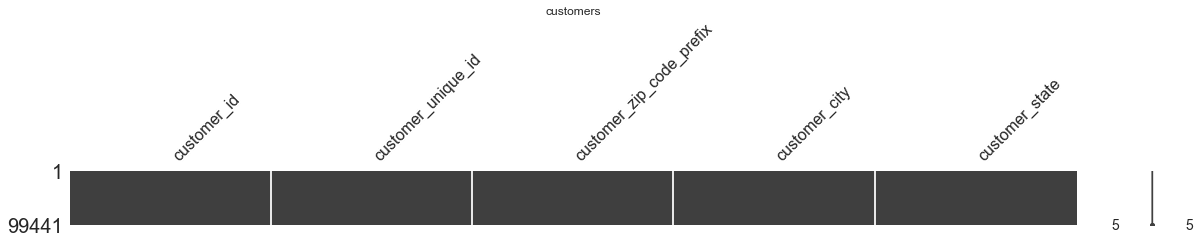

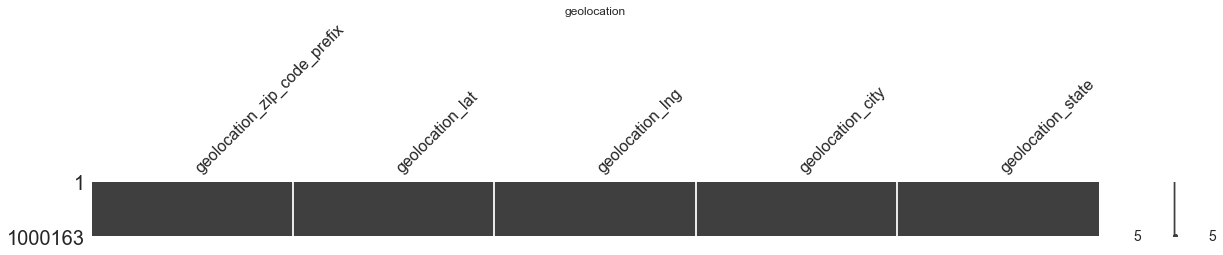

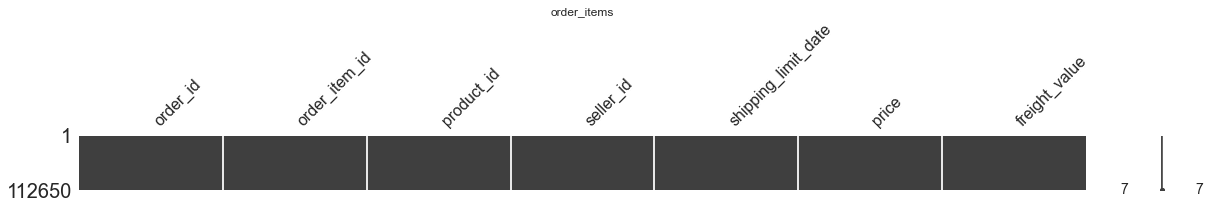

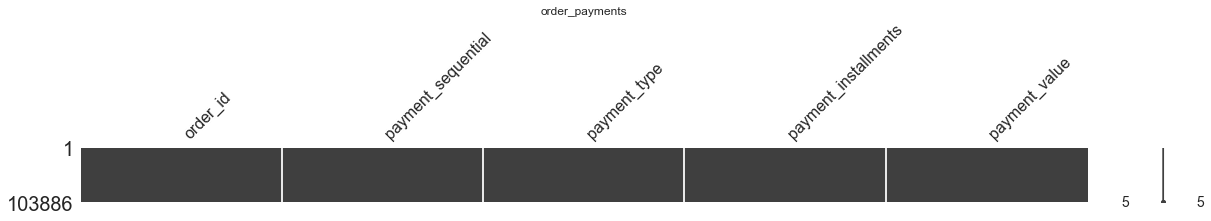

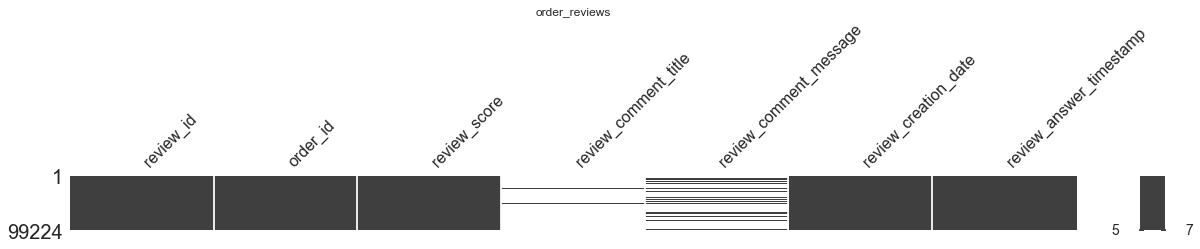

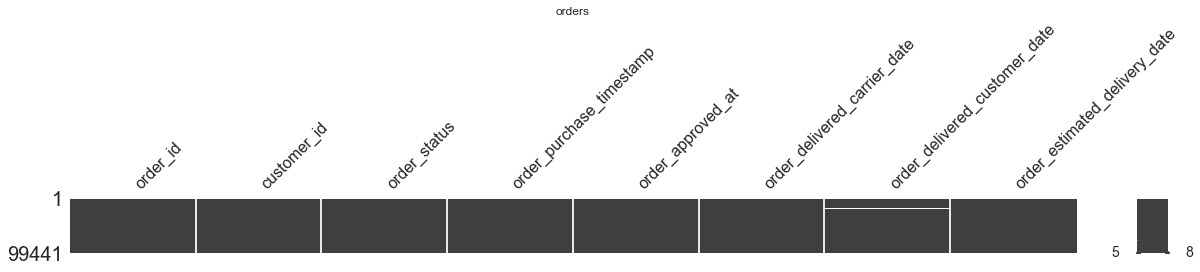

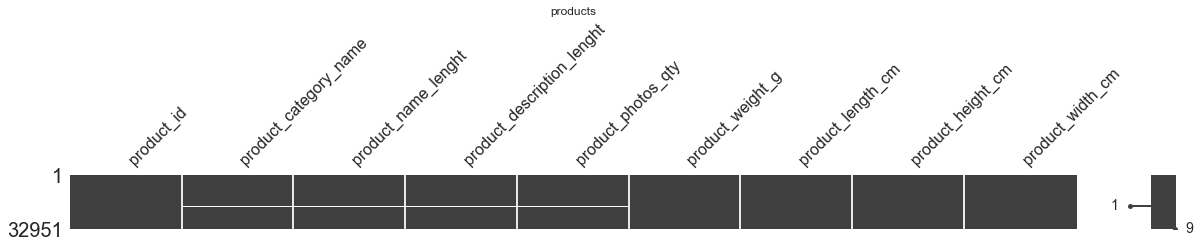

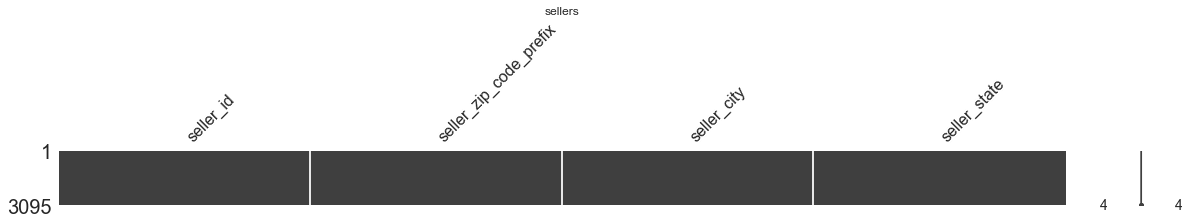

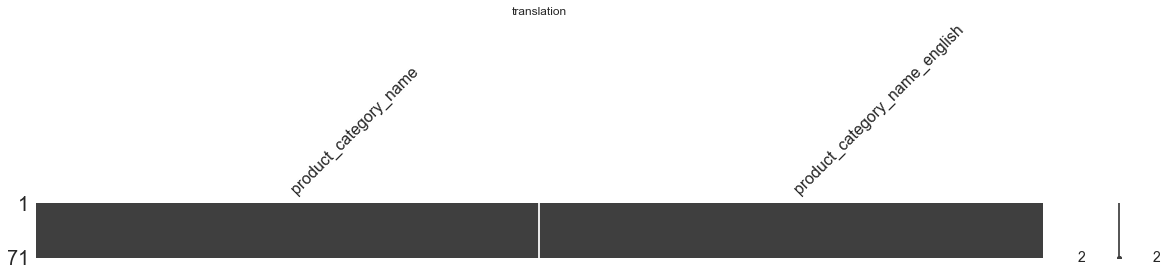

In [9]:
for base in base_list :
    nan_ana(base)

La base est trés bien renseignée : trés  peu de valeur manquante a part sur les commentaires qui sont bien sur optionnels
Quelques données manquantes sur les orders principalement sur les sujets de livraison
7% de donneés  manquantes sur les produits ( catégorie, nom, description) 

### Enregistrements en doublons

In [10]:
for base in base_list :
    name =[x for x in globals() if globals()[x] is base][0]
    print (name,base.shape, base.drop_duplicates().shape)
#La seule base comprenant des doublons est le base geolocation répertoriant les adresses 

customers (99441, 5) (99441, 5)
geolocation (1000163, 5) (738332, 5)
order_items (112650, 7) (112650, 7)
order_payments (103886, 5) (103886, 5)
order_reviews (99224, 7) (99224, 7)
orders (99441, 8) (99441, 8)
products (32951, 9) (32951, 9)
sellers (3095, 4) (3095, 4)
translation (71, 2) (71, 2)


## Création base RFM

### Schéma de la base

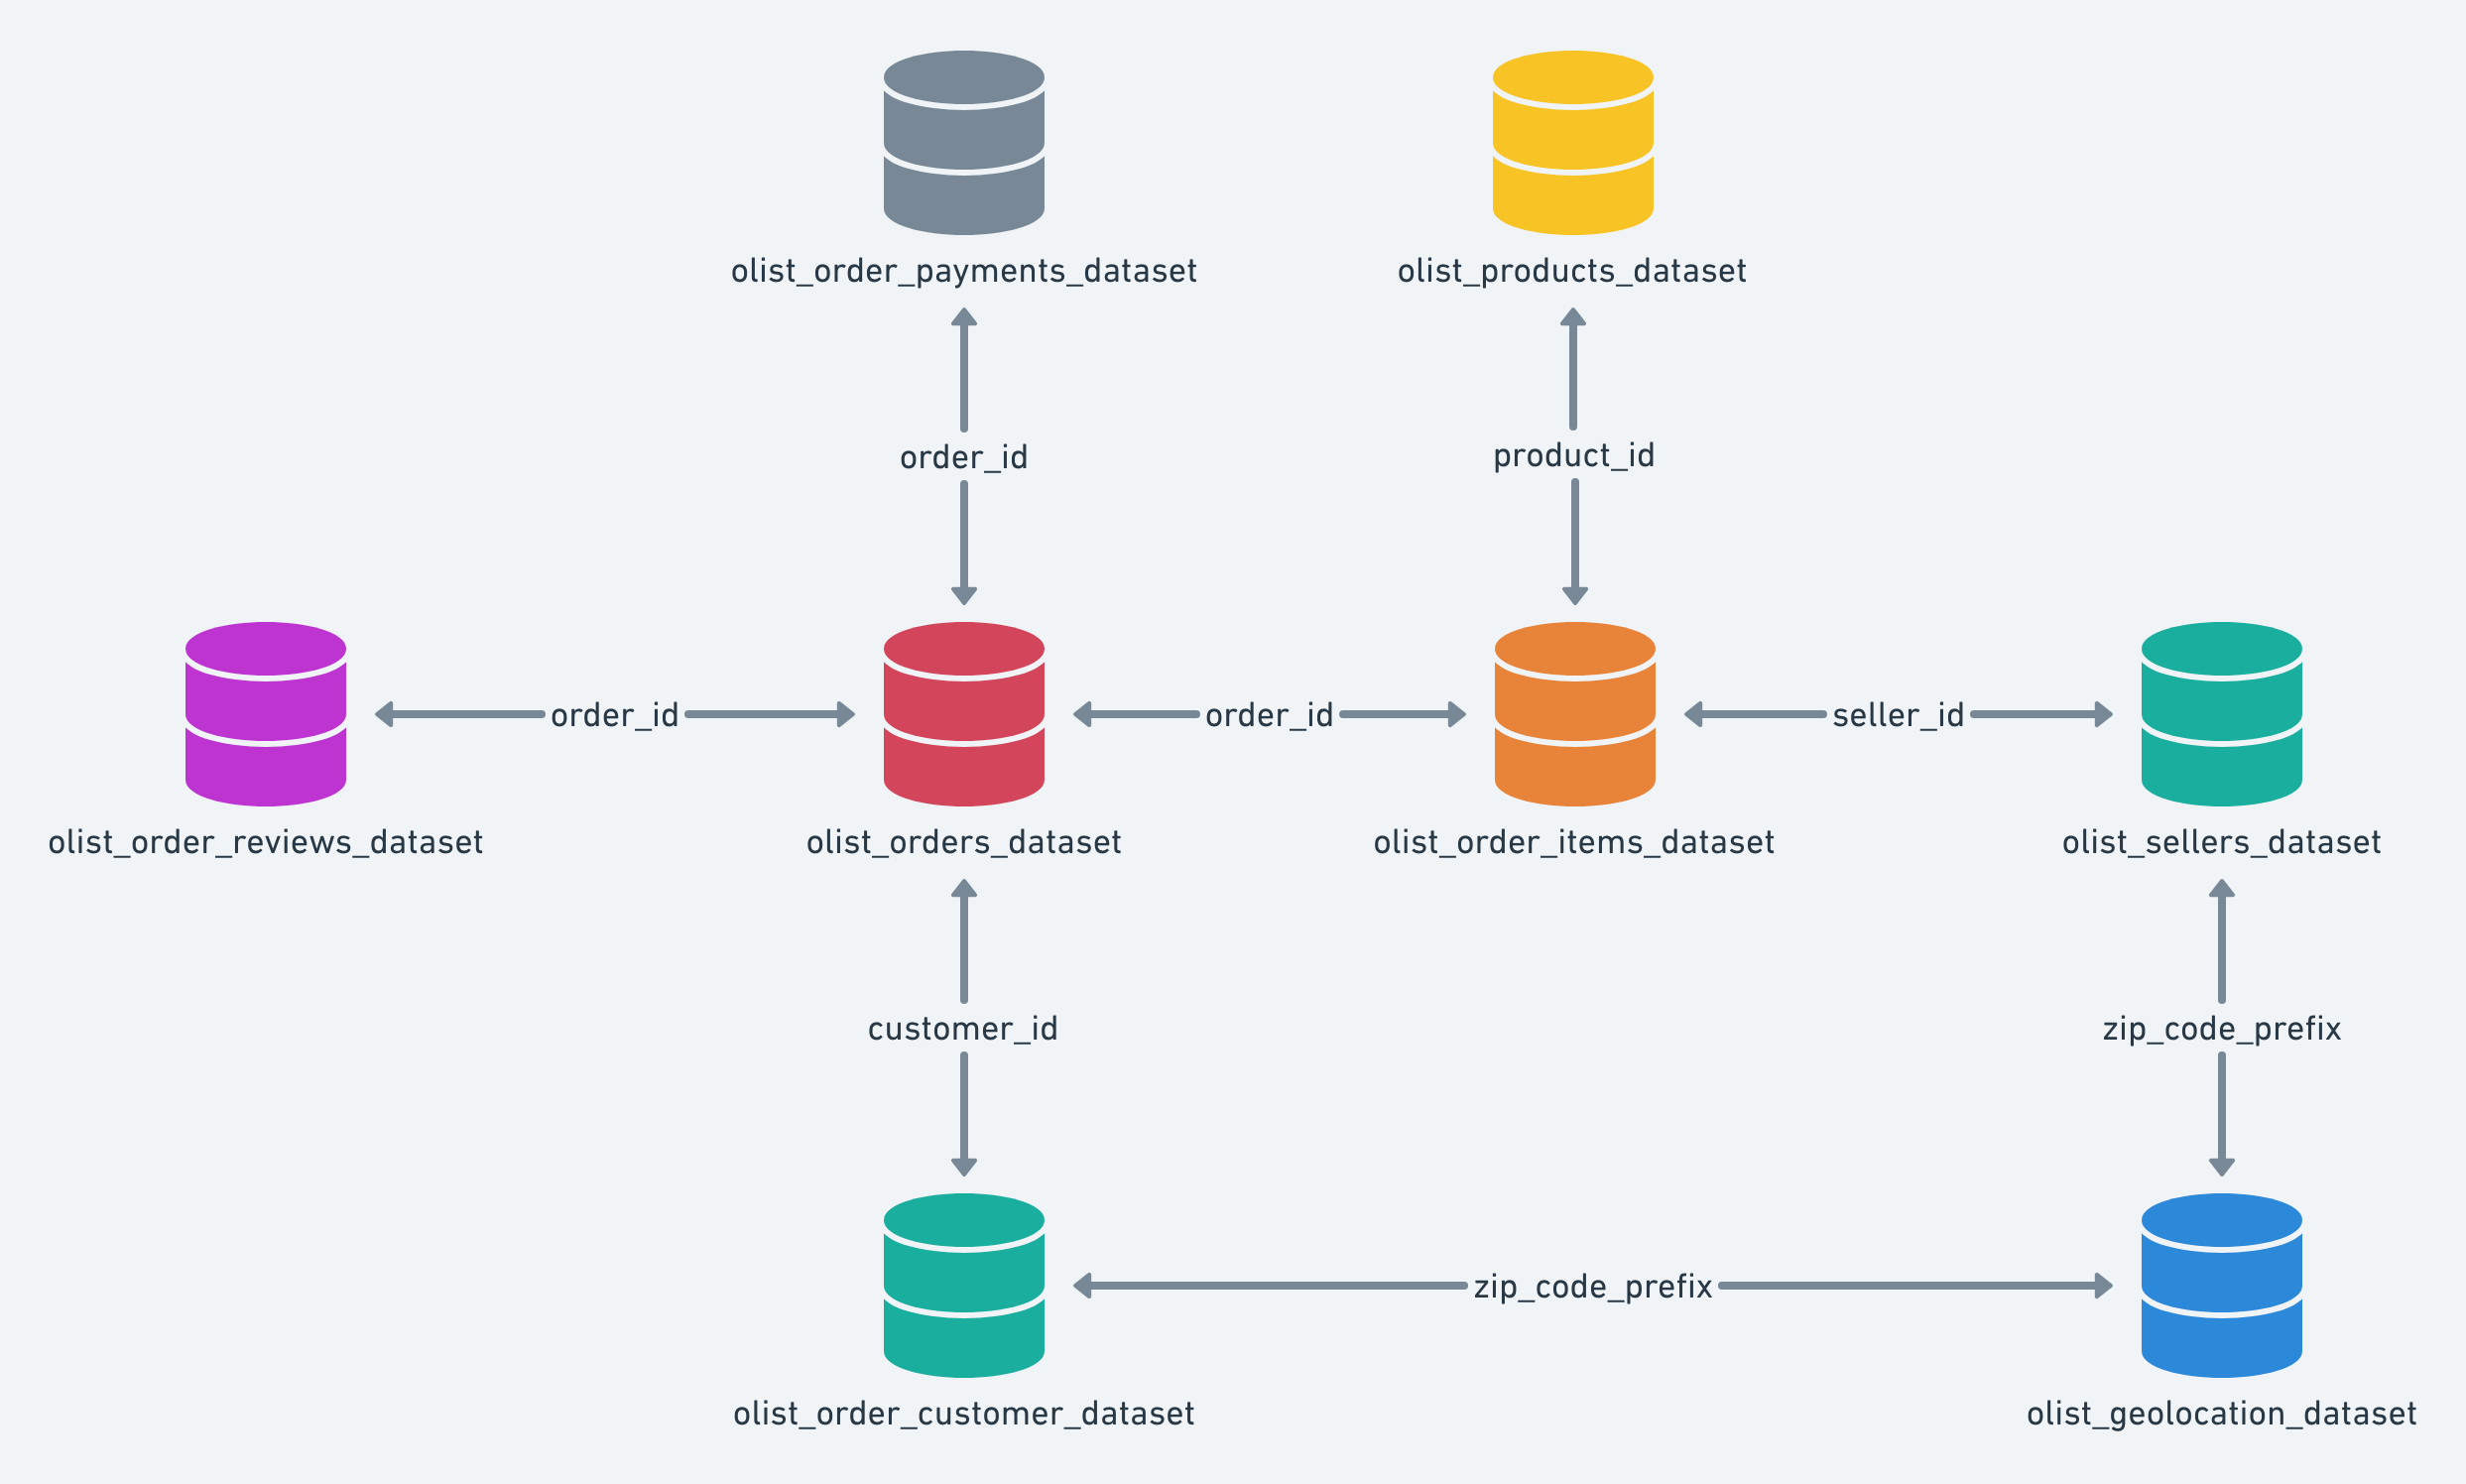

In [11]:
from IPython.display import Image
Image(filename='c:/Users/Hugues/gdrive/Notebooks/P5/olist_base.png')


Nous devons déterminer la Récence, Fréquence et Montants des achats par client. 

L'analyse order_payments.sum() indique que le montant total des Payment_value encaissé est de 16 008 872
et l'analyse order_items.sum() indique que le montant total des Price est de 13 591 643
La difference entre les deux montants de 17.8% peux s'expliquer par la TVA (si les prix sont affichés en hors taxe )
Les montants sont cohérents, il est possible d'utiliser l'une ou l'autre information pour les informations de montants. 


### création d'une base marketing en concatenant orders_payment, orders et customers

In [12]:
base_mkt_temp = pd.merge(order_payments,orders,on='order_id')

In [13]:
base_mkt = pd.merge(base_mkt_temp,customers,on='customer_id')

In [14]:
base_mkt

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00,4291db0da71914754618cd789aebcd56,18570,conchas,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04 00:00:00,b6027ac07fb76ebca8c97b1887865aee,12954,atibaia,SP
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12 00:00:00,53b30ca78efb2b7efcd3f9e461587eb2,30210,belo horizonte,MG
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaN,NaN,2017-12-05 00:00:00,d3c7da954a324253814096bcaf240e4e,1519,sao paulo,SP
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,delivered,2018-08-07 23:26:13,2018-08-07 23:45:00,2018-08-09 11:46:00,2018-08-21 22:41:46,2018-08-24 00:00:00,b84dc68f02f122a88d7e7bbd37b06204,22733,rio de janeiro,RJ


In [15]:
#103887 rows en utilisant outer plutot qu'inner ( par défaut) 

In [16]:
base_mkt.describe(include ='all') 

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,103886,103886.000000,103886,103886.000000,103886.000000,103886,103886,103886,103711,101998,100754,103886,103886,103886.000000,103886,103886
unique,99440,NaN,5,NaN,NaN,99440,8,98874,90732,81017,95663,458,96095,NaN,4119,27
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN,9af2372a1e49340278e7c1ef8d749f34,delivered,2017-04-20 12:45:34,2017-04-22 09:10:13,2018-05-09 15:48:00,2017-06-22 16:04:46,2017-12-20 00:00:00,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP
freq,29,NaN,76795,NaN,NaN,29,100756,29,29,47,26,563,33,NaN,16221,43622
mean,NaN,1.092679,NaN,2.853349,154.100380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35072.550555,NaN,NaN
std,NaN,0.706584,NaN,2.687051,217.494064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29743.491677,NaN,NaN
min,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,1.000000,NaN,1.000000,56.790000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11366.250000,NaN,NaN
50%,NaN,1.000000,NaN,1.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24360.000000,NaN,NaN
75%,NaN,1.000000,NaN,4.000000,171.837500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58418.000000,NaN,NaN


### Ne conserver que les commandes livrés

In [17]:
"""row_to_drop = base_mkt[base_mkt['order_status']!='delivered'].index.to_list()
temp = base_mkt.drop(row_to_drop)
base_mkt = temp"""

"row_to_drop = base_mkt[base_mkt['order_status']!='delivered'].index.to_list()\ntemp = base_mkt.drop(row_to_drop)\nbase_mkt = temp"

In [18]:
base_mkt.shape

(103886, 16)

## Détermination du nombre de commandes par acheteur

In [19]:
temp = base_mkt[['order_id','customer_unique_id']].drop_duplicates()


In [20]:
temp.describe()

,order_id,customer_unique_id
count,99440,99440
unique,99440,96095
top,b81ef226f3fe1789b1e8b2acac839d17,8d50f5eadf50201ccdcedfb9e2ac8455
freq,1,17


In [21]:

count_order = temp.groupby(by = 'customer_unique_id').aggregate(func='count')
#multi_order = count_order[count_order['order_id']>1]
count_order.rename(columns = {'order_id':'order_count'}, inplace = True)

In [22]:
count_order.describe()

,order_count
count,96095.000000
mean,1.034809
std,0.214385
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,17.000000


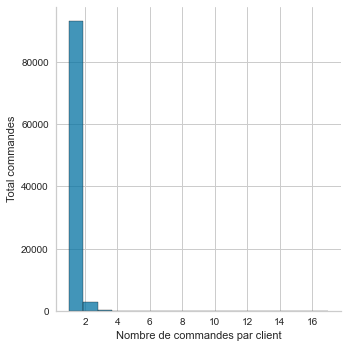

In [23]:
ax=sns.displot(data=count_order, x="order_count",kind='hist')
ax.set(
    xlabel="Nombre de commandes par client",
    ylabel="Total commandes",
    title="",
   
)


Text(0.5, 1.0, 'Répartition du nombre de commande')

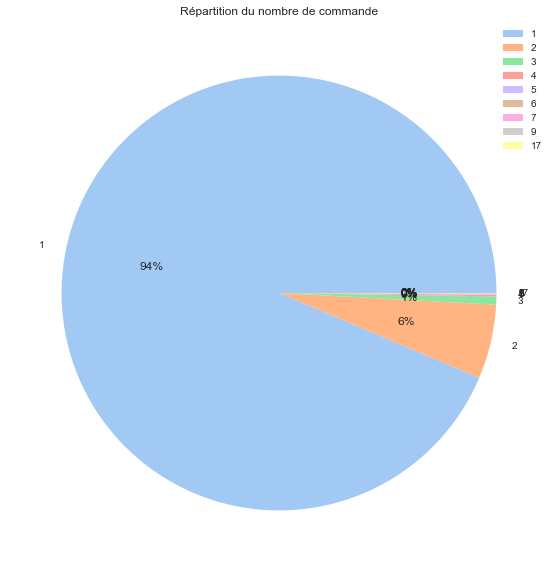

In [24]:
#df.groupby(['group_column']).sum().plot(kind='pie', y='value_column')
count_order['group']=count_order['order_count']
colors = sns.color_palette('pastel')[0:9]

ax = count_order.groupby(['group']).sum().plot(kind='pie',y='order_count', colors = colors, autopct='%.0f%%'
                                                    ,figsize = [10,10] )

ax.set_xlabel('')  # Add an x-label to the axes.
ax.set_ylabel('')  # Add a y-label to the axes.
ax.set_title("Répartition du nombre de commande")  # Add a title to the axes.
#ax.legend("Répartition du nombre de commande ");  # Add a legend.






<AxesSubplot:xlabel='order_count'>

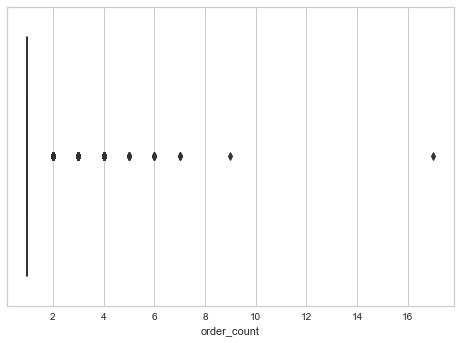

In [25]:
sns.boxplot(data=count_order, x="order_count")

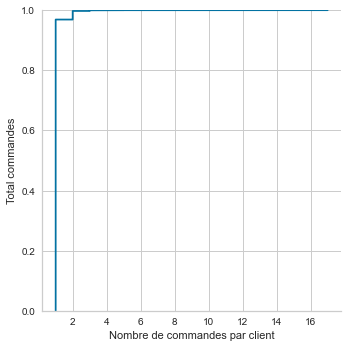

In [26]:
ax=sns.displot(data=count_order, x="order_count", kind = "ecdf")
ax.set(
    xlabel="Nombre de commandes par client",
    ylabel="Total commandes",
    title="",
   
)

In [27]:
base_order = pd.merge(count_order,base_mkt,on='customer_unique_id')

In [28]:
base_order.describe(include= 'all')

,customer_unique_id,order_count,group,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state
count,103886,103886.000000,103886.000000,103886,103886.000000,103886,103886.000000,103886.000000,103886,103886,103886,103711,101998,100754,103886,103886.000000,103886,103886
unique,96095,NaN,NaN,99440,NaN,5,NaN,NaN,99440,8,98874,90732,81017,95663,458,NaN,4119,27
top,9a736b248f67d166d2fbb006bcb877c3,NaN,NaN,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN,9af2372a1e49340278e7c1ef8d749f34,delivered,2017-04-20 12:45:34,2017-04-22 09:10:13,2018-05-09 15:48:00,2017-06-22 16:04:46,2017-12-20 00:00:00,NaN,sao paulo,SP
freq,33,NaN,NaN,29,NaN,76795,NaN,NaN,29,100756,29,29,47,26,563,NaN,16221,43622
mean,NaN,1.080146,1.080146,NaN,1.092679,NaN,2.853349,154.100380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35072.550555,NaN,NaN
std,NaN,0.394684,0.394684,NaN,0.706584,NaN,2.687051,217.494064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29743.491677,NaN,NaN
min,NaN,1.000000,1.000000,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,1.000000,1.000000,NaN,1.000000,NaN,1.000000,56.790000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11366.250000,NaN,NaN
50%,NaN,1.000000,1.000000,NaN,1.000000,NaN,1.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24360.000000,NaN,NaN
75%,NaN,1.000000,1.000000,NaN,1.000000,NaN,4.000000,171.837500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58418.000000,NaN,NaN


In [29]:
base_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103886 entries, 0 to 103885
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_unique_id             103886 non-null  object 
 1   order_count                    103886 non-null  int64  
 2   group                          103886 non-null  int64  
 3   order_id                       103886 non-null  object 
 4   payment_sequential             103886 non-null  int64  
 5   payment_type                   103886 non-null  object 
 6   payment_installments           103886 non-null  int64  
 7   payment_value                  103886 non-null  float64
 8   customer_id                    103886 non-null  object 
 9   order_status                   103886 non-null  object 
 10  order_purchase_timestamp       103886 non-null  object 
 11  order_approved_at              103711 non-null  object 
 12  order_delivered_carrier_date  

## déterminer le Montant des achats par customer

In [30]:
temp_v = base_order[['customer_unique_id','payment_value']]

In [31]:
temp_gbv= temp_v.groupby(by = 'customer_unique_id')

In [32]:
customers_amount= temp_gbv.sum()

In [33]:
temp_gbv.min()

,payment_value
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
0000f46a3911fa3c0805444483337064,86.22
0000f6ccb0745a6a4b88665a16c9f078,43.62
0004aac84e0df4da2b147fca70cf8255,196.89
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2067.42
fffea47cd6d3cc0a88bd621562a9d061,84.58
ffff371b4d645b6ecea244b27531430a,112.46


In [34]:
temp_gbv.max()

,payment_value
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
0000f46a3911fa3c0805444483337064,86.22
0000f6ccb0745a6a4b88665a16c9f078,43.62
0004aac84e0df4da2b147fca70cf8255,196.89
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2067.42
fffea47cd6d3cc0a88bd621562a9d061,84.58
ffff371b4d645b6ecea244b27531430a,112.46


### Date de 1ere commande et commande la plus récente par customer

In [35]:
temp_d = base_order[['customer_unique_id','order_approved_at']]
temp_d['order_approved_at']=pd.to_datetime(temp_d['order_approved_at'])
temp_gbd= temp_d.groupby(by = 'customer_unique_id')
customers_first_order=temp_gbd.min()
customers_recence= temp_gbd.max()
RFM1 = pd.merge(customers_amount,customers_first_order,on='customer_unique_id')
RFM1.rename(columns = {'order_approved_at':'first_order'}, inplace = True)
RFM = pd.merge(RFM1,customers_recence,on='customer_unique_id')
RFM.rename(columns = {'order_approved_at':'last_order'}, inplace = True)

C:\Users\Hugues\AppData\Local\Temp\ipykernel_15160\3245855214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_d['order_approved_at']=pd.to_datetime(temp_d['order_approved_at'])


In [36]:
temp_d.describe(datetime_is_numeric=True)

,order_approved_at
count,103711
mean,2017-12-30 07:37:30.303603200
min,2016-10-04 09:43:32
25%,2017-09-10 20:17:48.500000
50%,2018-01-17 18:19:21
75%,2018-05-03 23:55:08
max,2018-09-03 17:40:06


In [37]:
RFM.describe(datetime_is_numeric=True)

,payment_value,first_order,last_order
count,96095.000000,95996,95996
mean,166.594226,2017-12-31 07:09:10.258677504,2018-01-03 00:09:53.428215552
min,0.000000,2016-10-04 09:43:32,2016-10-04 09:43:32
25%,63.120000,2017-09-12 08:41:27,2017-09-15 15:42:40.750000128
50%,108.000000,2018-01-18 20:33:36,2018-01-22 14:23:03
75%,183.530000,2018-05-04 15:52:22.750000128,2018-05-07 16:55:48
max,13664.080000,2018-08-29 15:10:26,2018-09-03 17:40:06
std,231.428912,NaN,NaN


In [38]:
RFM['Duration']=RFM['last_order']-RFM['first_order']

In [39]:
RFM['Recence_date']=datetime.now()-RFM['last_order']+ timedelta(days = 1)

In [40]:
RFM['Recence']= RFM['Recence_date'] / timedelta(days = 1)

In [41]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96095 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   payment_value  96095 non-null  float64        
 1   first_order    95996 non-null  datetime64[ns] 
 2   last_order     95996 non-null  datetime64[ns] 
 3   Duration       95996 non-null  timedelta64[ns]
 4   Recence_date   95996 non-null  timedelta64[ns]
 5   Recence        95996 non-null  float64        
dtypes: datetime64[ns](2), float64(2), timedelta64[ns](2)
memory usage: 5.1+ MB


In [42]:
RFM.describe(include='all')

C:\Users\Hugues\AppData\Local\Temp\ipykernel_15160\2703725750.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  RFM.describe(include='all')
C:\Users\Hugues\AppData\Local\Temp\ipykernel_15160\2703725750.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  RFM.describe(include='all')


,payment_value,first_order,last_order,Duration,Recence_date,Recence
count,96095.000000,95996,95996,95996,95996,95996.000000
unique,NaN,88042,87885,NaN,NaN,NaN
top,NaN,2018-02-27 04:31:10,2018-02-27 04:31:10,NaN,NaN,NaN
freq,NaN,8,9,NaN,NaN,NaN
first,NaN,2016-10-04 09:43:32,2016-10-04 09:43:32,NaN,NaN,NaN
last,NaN,2018-08-29 15:10:26,2018-09-03 17:40:06,NaN,NaN,NaN
mean,166.594226,NaN,NaN,2 days 17:00:43.169538314,1801 days 22:10:31.922441248,1801.923981
std,231.428912,NaN,NaN,25 days 10:08:15.364458269,153 days 06:39:45.463662324,153.277610
min,0.000000,NaN,NaN,0 days 00:00:00,1558 days 04:40:19.350657,1558.194668
25%,63.120000,NaN,NaN,0 days 00:00:00,1677 days 05:24:37.350656992,1677.225432


### Frequence de commande ( nombre d'order) 

In [43]:
RFM_temp=RFM

In [44]:
RFM = pd.merge(RFM_temp,base_order[['customer_unique_id','order_count']].drop_duplicates(),on='customer_unique_id', how = 'inner')

In [45]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96095 entries, 0 to 96094
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   customer_unique_id  96095 non-null  object         
 1   payment_value       96095 non-null  float64        
 2   first_order         95996 non-null  datetime64[ns] 
 3   last_order          95996 non-null  datetime64[ns] 
 4   Duration            95996 non-null  timedelta64[ns]
 5   Recence_date        95996 non-null  timedelta64[ns]
 6   Recence             95996 non-null  float64        
 7   order_count         96095 non-null  int64          
dtypes: datetime64[ns](2), float64(2), int64(1), object(1), timedelta64[ns](2)
memory usage: 6.6+ MB


## Rajouter les reviews à la base

In [46]:
order_review_temp=pd.merge(order_reviews,orders,on='order_id')

In [47]:
order_review_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99224 entries, 0 to 99223
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   review_id                      99224 non-null  object
 1   order_id                       99224 non-null  object
 2   review_score                   99224 non-null  int64 
 3   review_comment_title           11568 non-null  object
 4   review_comment_message         40977 non-null  object
 5   review_creation_date           99224 non-null  object
 6   review_answer_timestamp        99224 non-null  object
 7   customer_id                    99224 non-null  object
 8   order_status                   99224 non-null  object
 9   order_purchase_timestamp       99224 non-null  object
 10  order_approved_at              99068 non-null  object
 11  order_delivered_carrier_date   97468 non-null  object
 12  order_delivered_customer_date  96359 non-null  object
 13  o

In [48]:
order_review=pd.merge(order_review_temp,customers,on='customer_id')

In [49]:
order_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99224 entries, 0 to 99223
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   review_id                      99224 non-null  object
 1   order_id                       99224 non-null  object
 2   review_score                   99224 non-null  int64 
 3   review_comment_title           11568 non-null  object
 4   review_comment_message         40977 non-null  object
 5   review_creation_date           99224 non-null  object
 6   review_answer_timestamp        99224 non-null  object
 7   customer_id                    99224 non-null  object
 8   order_status                   99224 non-null  object
 9   order_purchase_timestamp       99224 non-null  object
 10  order_approved_at              99068 non-null  object
 11  order_delivered_carrier_date   97468 non-null  object
 12  order_delivered_customer_date  96359 non-null  object
 13  o

In [50]:
RFM_temp=RFM
RFM=pd.merge(RFM_temp,order_review,on='customer_unique_id')

In [51]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99223 entries, 0 to 99222
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   customer_unique_id             99223 non-null  object         
 1   payment_value                  99223 non-null  float64        
 2   first_order                    99124 non-null  datetime64[ns] 
 3   last_order                     99124 non-null  datetime64[ns] 
 4   Duration                       99124 non-null  timedelta64[ns]
 5   Recence_date                   99124 non-null  timedelta64[ns]
 6   Recence                        99124 non-null  float64        
 7   order_count                    99223 non-null  int64          
 8   review_id                      99223 non-null  object         
 9   order_id                       99223 non-null  object         
 10  review_score                   99223 non-null  int64          
 11  re

## Recap base RFM et export

In [52]:
RFM.describe(include='all',datetime_is_numeric='true')

,customer_unique_id,payment_value,first_order,last_order,Duration,Recence_date,Recence,order_count,review_id,order_id,...,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state
count,99223,99223.000000,99124,99124,99124,99124,99124.000000,99223.000000,99223,99223,...,99223,99223,99223,99067,97467,96358,99223,99223.000000,99223,99223
unique,95379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98409,98672,...,98672,8,98114,90081,80450,95021,458,NaN,4117,27
top,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c444278834184f72b1484dfe47de7f97,03c939fd7fd3b38f8485a0f95798f1f6,...,2a35ad9f439dfc62d35a0202e71d6c66,delivered,2018-03-31 15:08:21,2018-02-27 04:31:10,2018-05-09 15:48:00,2017-12-02 00:26:45,2017-12-20 00:00:00,NaN,sao paulo,SP
freq,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,...,3,96360,5,9,47,3,525,NaN,15522,41689
mean,NaN,172.845204,2017-12-28 17:53:38.637887744,2018-01-03 15:17:47.782897920,5 days 21:24:09.145010290,1801 days 07:02:37.567758784,1801.293490,1.084355,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35157.316167,NaN,NaN
min,NaN,0.000000,2016-10-04 09:43:32,2016-10-04 09:43:32,0 days 00:00:00,1558 days 04:40:19.350657,1558.194668,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,64.170000,2017-09-07 18:52:21.249999872,2017-09-16 14:01:31,0 days 00:00:00,1677 days 03:04:55.350656992,1677.128418,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11340.000000,NaN,NaN
50%,NaN,111.800000,2018-01-16 13:57:39.500000,2018-01-23 03:36:49.500000,0 days 00:00:00,1781 days 18:43:35.850656992,1781.780276,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24415.000000,NaN,NaN
75%,NaN,190.090000,2018-05-02 21:19:04.500000,2018-05-07 19:15:30,0 days 00:00:00,1910 days 08:18:54.350656992,1910.346462,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59022.000000,NaN,NaN
max,NaN,13664.080000,2018-08-29 15:10:26,2018-09-03 17:40:06,629 days 20:50:02,2257 days 12:36:53.350657,2257.525617,17.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99990.000000,NaN,NaN


In [53]:
RFM

,customer_unique_id,payment_value,first_order,last_order,Duration,Recence_date,Recence,order_count,review_id,order_id,...,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,2018-05-10 11:11:18,2018-05-10 11:11:18,0 days,1674 days 11:09:07.350657,1674.464668,1,13359f48c3c7e41a2b8afca340937eeb,e22acc9c116caa3f2b7121bbb380d08e,...,fadbb3709178fc513abc1b2670aa1ad2,delivered,2018-05-10 10:56:27,2018-05-10 11:11:18,2018-05-12 08:18:00,2018-05-16 20:48:37,2018-05-21 00:00:00,7787,cajamar,SP
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,2018-05-07 18:25:44,2018-05-07 18:25:44,0 days,1677 days 03:54:41.350657,1677.162979,1,e383e10e36a765f04f752a37c1674e43,3594e05a005ac4d06a72673270ef9ec9,...,4cb282e167ae9234755102258dd52ee8,delivered,2018-05-07 11:11:27,2018-05-07 18:25:44,2018-05-09 12:18:00,2018-05-10 18:02:42,2018-05-15 00:00:00,6053,osasco,SP
2,0000f46a3911fa3c0805444483337064,86.22,2017-03-10 21:05:03,2017-03-10 21:05:03,0 days,2100 days 01:15:22.350657,2100.052342,1,d89cb4217c23008b141e66c3160de8a4,b33ec3b699337181488304f362a6b734,...,9b3932a6253894a02c1df9d19004239f,delivered,2017-03-10 21:05:03,2017-03-10 21:05:03,2017-03-13 12:58:30,2017-04-05 14:38:47,2017-04-07 00:00:00,88115,sao jose,SC
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,2017-10-12 20:49:17,2017-10-12 20:49:17,0 days,1884 days 01:31:08.350657,1884.063291,1,6f22e4ad2cd9e0d40c5842e4787b4321,41272756ecddd9a9ed0180413cc22fb6,...,914991f0c02ef0843c0e7010c819d642,delivered,2017-10-12 20:29:41,2017-10-12 20:49:17,2017-10-13 20:08:19,2017-11-01 21:23:05,2017-11-13 00:00:00,66812,belem,PA
4,0004aac84e0df4da2b147fca70cf8255,196.89,2017-11-14 20:06:52,2017-11-14 20:06:52,0 days,1851 days 02:13:33.350657,1851.092747,1,880a77e7dd4e496969f138f974cc44a1,d957021f1127559cd947b62533f484f7,...,47227568b10f5f58a524a75507e6992c,delivered,2017-11-14 19:45:42,2017-11-14 20:06:52,2017-11-16 19:52:10,2017-11-27 23:08:56,2017-12-05 00:00:00,18040,sorocaba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99218,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42,2017-06-08 21:15:16,2017-06-08 21:15:16,0 days,2010 days 01:05:09.350657,2010.045247,1,bf0bcc92778d81c81f4e270732edcee6,725cf8e9c24e679a8a5a32cb92c9ce1e,...,74be082247cd677a147d83ee670e9d53,delivered,2017-06-08 21:00:36,2017-06-08 21:15:16,2017-06-23 13:03:27,2017-07-06 09:22:00,2017-08-02 00:00:00,55250,sanharo,PE
99219,fffea47cd6d3cc0a88bd621562a9d061,84.58,2017-12-10 20:16:20,2017-12-10 20:16:20,0 days,1825 days 02:04:05.350657,1825.086173,1,b194b439cde1d72277a2d0545a5de82e,c71b9252fd7b3b263aaa4cb09319a323,...,0ecf8e0a08148af0bf313184f167670a,delivered,2017-12-10 20:07:56,2017-12-10 20:16:20,2017-12-21 16:27:01,2018-01-09 22:28:20,2018-01-12 00:00:00,44054,feira de santana,BA
99220,ffff371b4d645b6ecea244b27531430a,112.46,2017-02-07 16:02:44,2017-02-07 16:02:44,0 days,2131 days 06:17:41.350657,2131.262284,1,11c3e9036551ef3649c3c781f9d24e1d,fdc45e6c7555e6cb3cc0daca2557dbe1,...,27f584b0f1dc4e610065c240f68b6be0,delivered,2017-02-07 15:49:16,2017-02-07 16:02:44,2017-02-08 10:04:37,2017-02-22 12:45:04,2017-03-24 00:00:00,78552,sinop,MT
99221,ffff5962728ec6157033ef9805bacc48,133.69,2018-05-02 15:58:47,2018-05-02 15:58:47,0 days,1682 days 06:21:38.350657,1682.265027,1,9afc85900a86fb8df3c31721f1869756,94d3ee0bc2a0af9d4fa47a4d63616e8d,...,832a3b0254347d409512ae92eaf154a6,delivered,2018-05-02 15:17:41,2018-05-02 15:58:47,2018-05-03 16:45:00,2018-05-14 11:54:26,2018-05-28 00:00:00,29460,bom jesus do norte,ES


## remplacer les informations manquantes de la base reviews par "missing" 

In [54]:
features =RFM.select_dtypes(include= 'object').columns.tolist() 
for feat in features : 
    mask = RFM[feat].isna()
    RFM.loc[mask,feat]= "missing"  
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99223 entries, 0 to 99222
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   customer_unique_id             99223 non-null  object         
 1   payment_value                  99223 non-null  float64        
 2   first_order                    99124 non-null  datetime64[ns] 
 3   last_order                     99124 non-null  datetime64[ns] 
 4   Duration                       99124 non-null  timedelta64[ns]
 5   Recence_date                   99124 non-null  timedelta64[ns]
 6   Recence                        99124 non-null  float64        
 7   order_count                    99223 non-null  int64          
 8   review_id                      99223 non-null  object         
 9   order_id                       99223 non-null  object         
 10  review_score                   99223 non-null  int64          
 11  re

In [55]:

row_to_drop = RFM [RFM.isna().any(axis= 'columns')].index.tolist()
print (len (row_to_drop))
temp = RFM.drop ( index= row_to_drop)
RFM = temp

99


In [56]:
(RFM.reset_index().drop(columns='index')).to_csv("RFM_livraison.csv")

In [57]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99124 entries, 0 to 99222
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   customer_unique_id             99124 non-null  object         
 1   payment_value                  99124 non-null  float64        
 2   first_order                    99124 non-null  datetime64[ns] 
 3   last_order                     99124 non-null  datetime64[ns] 
 4   Duration                       99124 non-null  timedelta64[ns]
 5   Recence_date                   99124 non-null  timedelta64[ns]
 6   Recence                        99124 non-null  float64        
 7   order_count                    99124 non-null  int64          
 8   review_id                      99124 non-null  object         
 9   order_id                       99124 non-null  object         
 10  review_score                   99124 non-null  int64          
 11  re